In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import os

Making the dataset files

In [2]:
!mkdir /content/mydataset
!mkdir /content/mydataset/train
!mkdir /content/mydataset/valid
!mkdir /content/mydataset/test

mkdir: cannot create directory ‘/content/mydataset’: File exists
mkdir: cannot create directory ‘/content/mydataset/train’: File exists
mkdir: cannot create directory ‘/content/mydataset/valid’: File exists
mkdir: cannot create directory ‘/content/mydataset/test’: File exists


In [3]:
for i in range(80):
    with open(f'/content/mydataset/train/{str(i)}.txt','w', encoding='utf-8') as file:
        file.write(f'training file #{str(i)}')
for i in range(10):
    with open(f'/content/mydataset/valid/{str(i)}.txt','w',encoding='utf-8')as file:
        file.write(f'validtion file #{str(i)}')
for i in range(10):
    with open(f'/content/mydataset/test/{str(i)}.txt','w',encoding='utf-8')as file:
        file.write(f'testing file#{str(i)}')

Loading it into a Dataset object recognizable by Pytorch

In [4]:
class MyTextDataset(Dataset):
    def __init__(self, path):
        def sort_key(item):
            return int(item.replace('.txt',''))
            
        files_lst = os.listdir(path)
        files_lst = sorted([item for item in files_lst if item.endswith('.txt')], key=sort_key)
        self.texts = []
        for file_name in files_lst:
            with open(path+file_name, 'r') as file:
                file_content = file.read()
                self.texts.append(file_content)
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, idx):
        original_item = self.texts[idx]
        tokens = original_item.split()
        length_lst = [len(token) for token in tokens]
        length_lst = length_lst[:20] if len(length_lst) >= 20 else length_lst + [0 for i in range(20-len(length_lst))]
        return torch.Tensor(length_lst)



In [5]:
train_dataset = MyTextDataset('/content/mydataset/train/')

Working with the dataset

In [6]:
len(train_dataset)

80

In [7]:
train = list(range(55))

In [8]:
train_dataloader = DataLoader(train_dataset,batch_size=32,shuffle=True)

In [9]:
for idx,batch in enumerate(iter(train_dataloader)):
    print(f'Batch{str(idx)}:{str(batch.size())}')

Batch0:torch.Size([32, 20])
Batch1:torch.Size([32, 20])
Batch2:torch.Size([16, 20])


MNIST Dataset

In [10]:
mnist_dataset = torchvision.datasets.MNIST('/',train=True,download=True,
                                           transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))

In [11]:
mnist_dataloader = torch.utils.data.DataLoader(mnist_dataset, batch_size=64,shuffle=True)

In [12]:
len(mnist_dataset)

60000

In [13]:
mnist_dataset[60]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

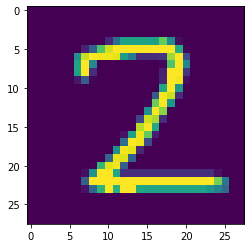

In [14]:
plt.imshow(mnist_dataset[5400][0].squeeze().numpy());

In [15]:
mnist_dataset[50][0].shape

torch.Size([1, 28, 28])

In [16]:
mnist_dataset[50][1]

3

What about the batches?

In [17]:
for idx, batch in enumerate(iter(mnist_dataloader)):
    print(f'Batch{str(idx)}:{str(batch[0].size())}')

Batch0:torch.Size([64, 1, 28, 28])
Batch1:torch.Size([64, 1, 28, 28])
Batch2:torch.Size([64, 1, 28, 28])
Batch3:torch.Size([64, 1, 28, 28])
Batch4:torch.Size([64, 1, 28, 28])
Batch5:torch.Size([64, 1, 28, 28])
Batch6:torch.Size([64, 1, 28, 28])
Batch7:torch.Size([64, 1, 28, 28])
Batch8:torch.Size([64, 1, 28, 28])
Batch9:torch.Size([64, 1, 28, 28])
Batch10:torch.Size([64, 1, 28, 28])
Batch11:torch.Size([64, 1, 28, 28])
Batch12:torch.Size([64, 1, 28, 28])
Batch13:torch.Size([64, 1, 28, 28])
Batch14:torch.Size([64, 1, 28, 28])
Batch15:torch.Size([64, 1, 28, 28])
Batch16:torch.Size([64, 1, 28, 28])
Batch17:torch.Size([64, 1, 28, 28])
Batch18:torch.Size([64, 1, 28, 28])
Batch19:torch.Size([64, 1, 28, 28])
Batch20:torch.Size([64, 1, 28, 28])
Batch21:torch.Size([64, 1, 28, 28])
Batch22:torch.Size([64, 1, 28, 28])
Batch23:torch.Size([64, 1, 28, 28])
Batch24:torch.Size([64, 1, 28, 28])
Batch25:torch.Size([64, 1, 28, 28])
Batch26:torch.Size([64, 1, 28, 28])
Batch27:torch.Size([64, 1, 28, 28])
Ba

In [18]:
937*64+32

60000